In [1]:
!conda activate wheat

In [2]:
import pandas as pd
import numpy as np
import cv2
import os
from PIL import Image
from typing import Tuple, List
from matplotlib import pyplot as plt

In [5]:
DATA_DIR = '../../data/nfl-impact-detection/'
TRAIN_DIR = os.path.join(DATA_DIR, 'images')

In [6]:
META_FILE = os.path.join(DATA_DIR, 'image_labels.csv')
# Read in the image labels file
img_labels = pd.read_csv(META_FILE)
img_labels.head()

,image,label,left,width,top,height
0,57503_000116_Endzone_frame443.jpg,Helmet,1099,16,456,15
1,57503_000116_Endzone_frame443.jpg,Helmet,1117,15,478,16
2,57503_000116_Endzone_frame443.jpg,Helmet,828,16,511,15
3,57503_000116_Endzone_frame443.jpg,Helmet,746,16,519,16
4,57503_000116_Endzone_frame443.jpg,Helmet,678,17,554,17


In [7]:
img_path = '../../data/nfl-impact-detection/images/57503_000116_Endzone_frame443.jpg'

In [8]:
image = cv2.imread(img_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

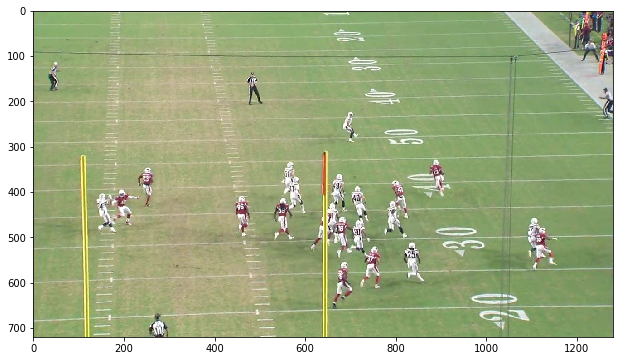

In [9]:
plt.figure(figsize=(12,6))        
plt.imshow(image) 
plt.show()

In [16]:
def load_image_boxes(images_dir: str, image_id: str, labels: pd.DataFrame, format: str = 'pascal_voc') -> Tuple[np.array, List[int]]:
    """
    Load image and boxes in coco or pascal_voc format
        Args:
        
    """
    image = cv2.imread(f'{images_dir}/{image_id}', cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    records = labels[labels['image'] == image_id]
    # coco format
    boxes = records[['left', 'top', 'width', 'height']].values
    print(boxes.shape)
    # pascal voc format    
    if format == 'pascal_voc': # xyxy
        boxes[:, 2] = boxes[:, 0] + boxes[:, 2] 
        boxes[:, 3] = boxes[:, 1] + boxes[:, 3]

    return image, boxes

In [21]:
def test_load_image():
    images_dir = TRAIN_DIR               
    labels = pd.read_csv(META_FILE)
    image_id = labels.image.unique()[0]
    print(f'{images_dir}/{image_id}')
    image, boxes = load_image_boxes(images_dir, image_id, labels)   
    for box in boxes:
        cv2.rectangle(image, (box[0], box[1]), (box[2],  box[3]), (0, 1, 0), 2) 
    # image = image.astype(np.float32) / 255    
    plt.figure(1, figsize=(12,6))        
    plt.imshow(image) 
    plt.title(image_id)

../../data/nfl-impact-detection/images/57503_000116_Endzone_frame443.jpg
(22, 4)


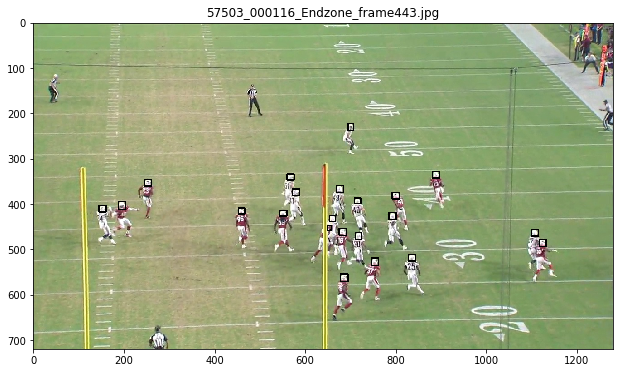

In [22]:
test_load_image()